# Chapter 4 Classification Exercises 

Dimitri Kestenbaum 

* 6. Suppose we collect data for a group of students in a statistics class with variables: 

$${X_1} = hours studied$$ 

$${X_2} = undergrad GPA$$

$${Y}= recieve an A$$ 

We fit a logisitc regression and produce estimated coefficients:

$${\hat\beta_0  = -6}$$
$${\hat\beta_1 = 0.05}$$
$${\hat\beta_2 = 1}$$

* (a) Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.

* (b) How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?

In [89]:
#a 

#initiate Euler's number
e = exp(1)

#initialize coefficient vars 
bHat0 = -6 
bHat1 = 0.05
bHat2 = 1


#initialize input vars
X1 = 40 #hours studied
X2 = 3.5 #undergrad GPA


probXa = ((e^(bHat0 + bHat1*X1 + bHat2*X2)) / (1 + e^(bHat0 + bHat1*X1 + bHat2*X2))) #logistic regression

sprintf("Probability of getting an A: %.3f",probXa)

[1] "Probability of getting an A: 0.378"

In [90]:
#b

#((e^(bHat0 + bHat1*X1 + bHat2*X2)) / (1 + e^(bHat0 + bHat1*X1 + bHat2*X2))) = 0.5

#((e^(bHat0 + bHat1*X1 + bHat2*X2)) = (1 + e^(bHat0 + bHat1*X1 + bHat2*X2))) * 0.5

X1 = log(1) + 2.5 / 0.05

sprintf("%i Hours", X1)

[1] "50 Hours"

* 8.  Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logisitc regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

Logistic regression is preferred in this situation. 

When applying KNN and selecting K=1 in almost all cases your train error rate will be zero. When attempting to generalize to a unseen test observation, KNN will look for the point which is closest within the training observations and use its response value. 

Considering, the likeliness of a train error rate of zero, if the average error rate = 18% for the KNN model then the test error rate must be approximately 2 * 18 = 36% which is greater than the test error of the logistic regression model. 

* 9. This problem has to do with odds. 

 * (a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default? 
 
 * (b) Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default? 

In [91]:
#a
#odds = p/1-p 

#0.37 * 1-p = p

p = 0.37/1.37

sprintf("Probability of default : %.2f",p)

[1] "Probability of default : 0.27"

In [92]:
#b 

odds = 0.16/(1 - 0.16)

sprintf("Odds that she defaults : %.4f",odds)

[1] "Odds that she defaults : 0.1905"

* This question should be answered using the `Weekly` data set, which is part of the `ISLR` package. This data is similar in nature to the `Smarket` data from this chapter's lab, exept that it contains 1,089 weekly returns for 21 years, from the begginning of 1990 to the end of 2010.

* (a) Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be patterns?

In [93]:
#load libraries

suppressWarnings({if(!require('ISLR')){
    install.packages('ISLR')
    library('ISLR')
}

if(!require('ggplot2')){
    install.packages('ggplot2')
    library('ggplot2')
}

if(!require('dplyr')) {
    install.packages('dplyr')
    library('dplyr')
}
 
if(!require('corrplot')){
    install.packages('corrplot')
    library('corrplot')
}

if(!require('caret')){
    install.packages('caret')
    library('caret')
}
if(!require('MASS')){
    install.packages('MASS')
    library('MASS')
}
if(!require('class')){
    install.packages('class')
    library('class')
}
if(!require('RColorBrewer')){
    install.packages('RColorBrewer')
    library('RColorBrewer')
}
if(!require('viridis')){
    install.packages('viridis')
    library('viridis')
}
if(!require('gridExtra')){
    install.packages('gridExtra')
    library('gridExtra')
}
if(!require('grid')){
    install.packages('grid')
    library('grid')
}})

In [94]:
#load Weekly dataset
data('Weekly')

In [95]:
head(Weekly)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [96]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [97]:
colnames(Weekly)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [98]:
nrow(Weekly)

[1] 1089

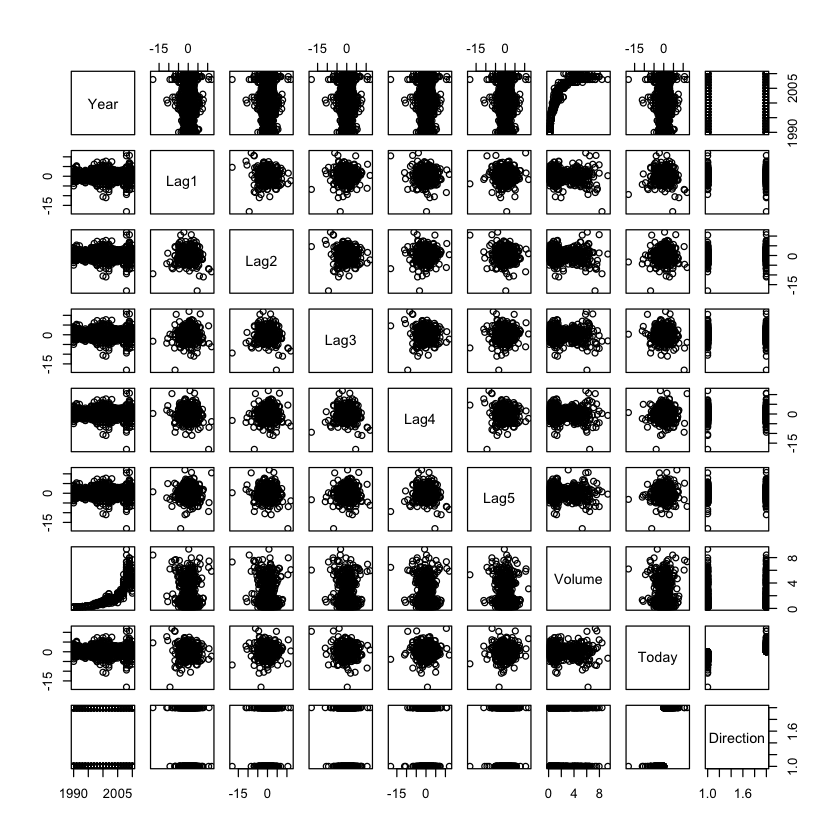

In [99]:
pairs(Weekly)

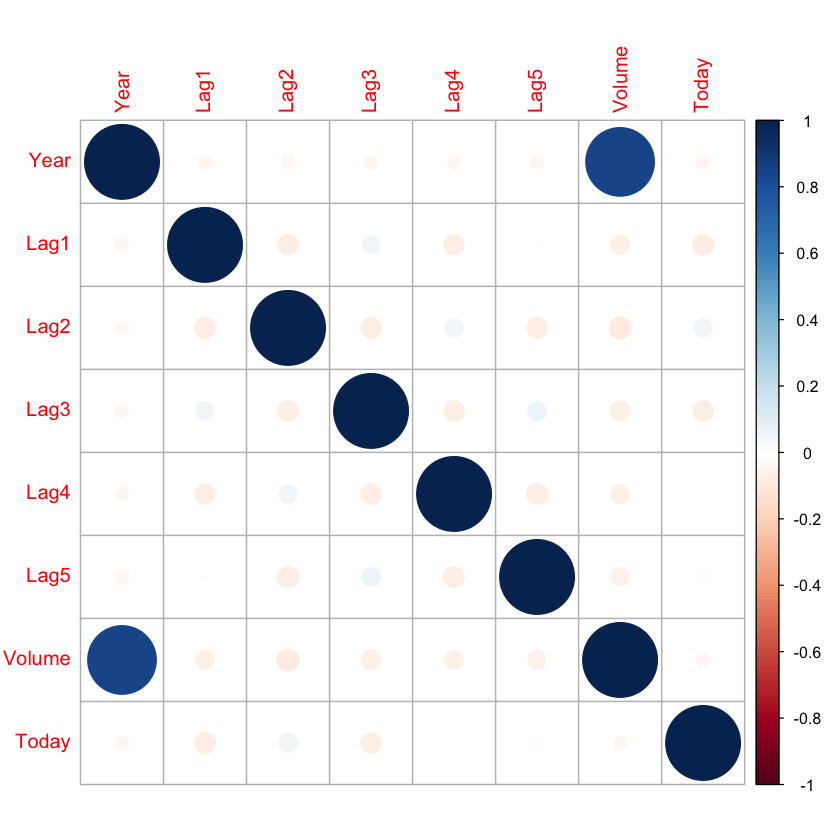

In [100]:
#plot correlation matrix
corrplot(cor(Weekly[,-9]))

In [101]:
#only significant correlation exists between Volume,Year

In [102]:
colnames(Weekly[2])

[1] "Lag1"

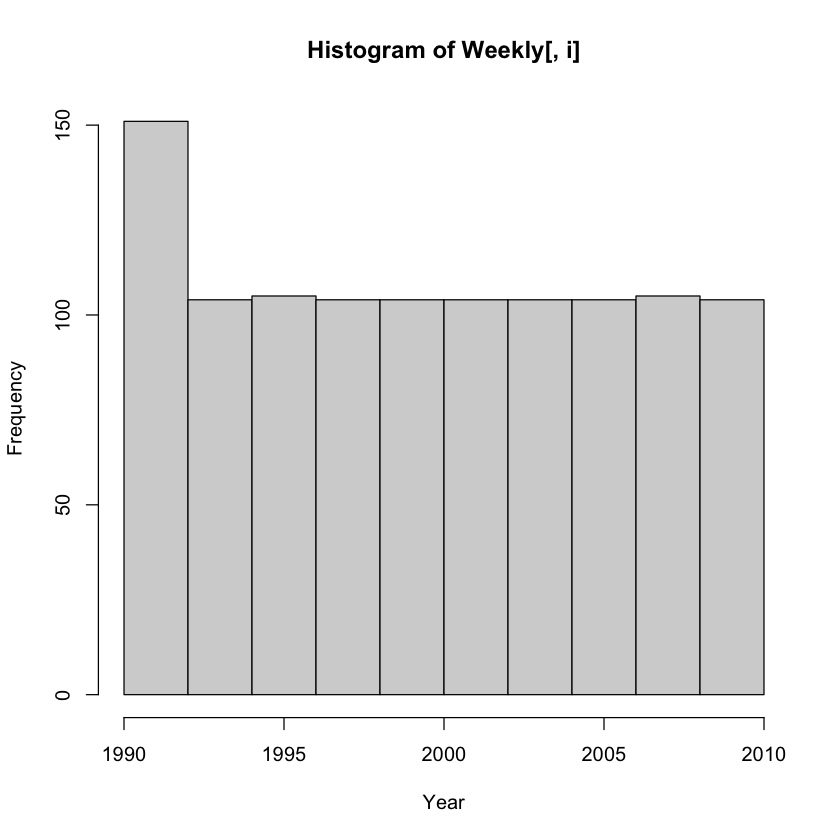

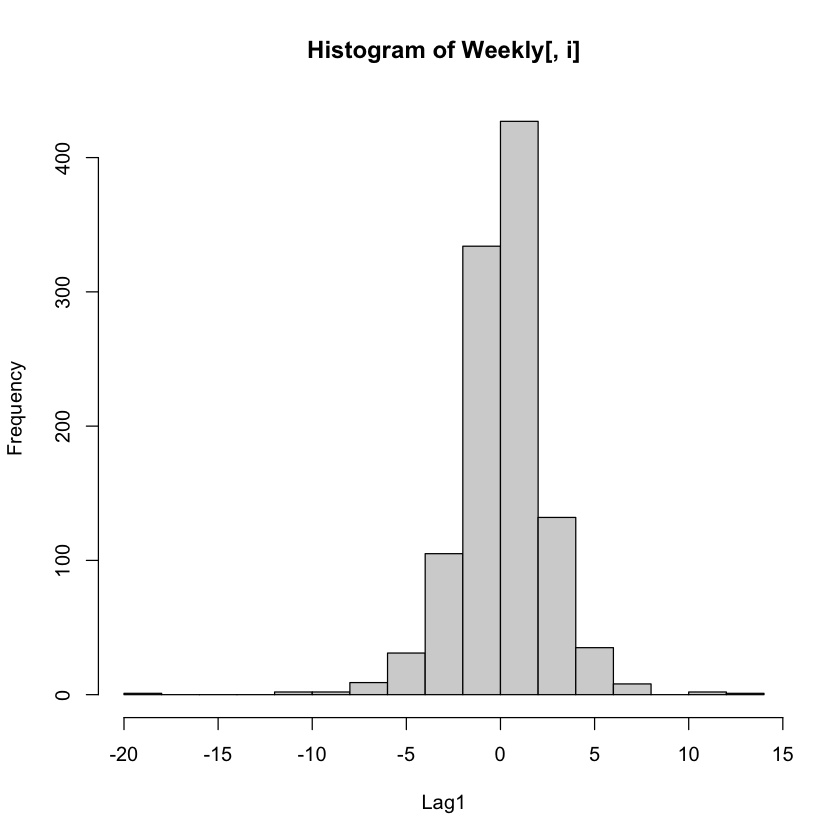

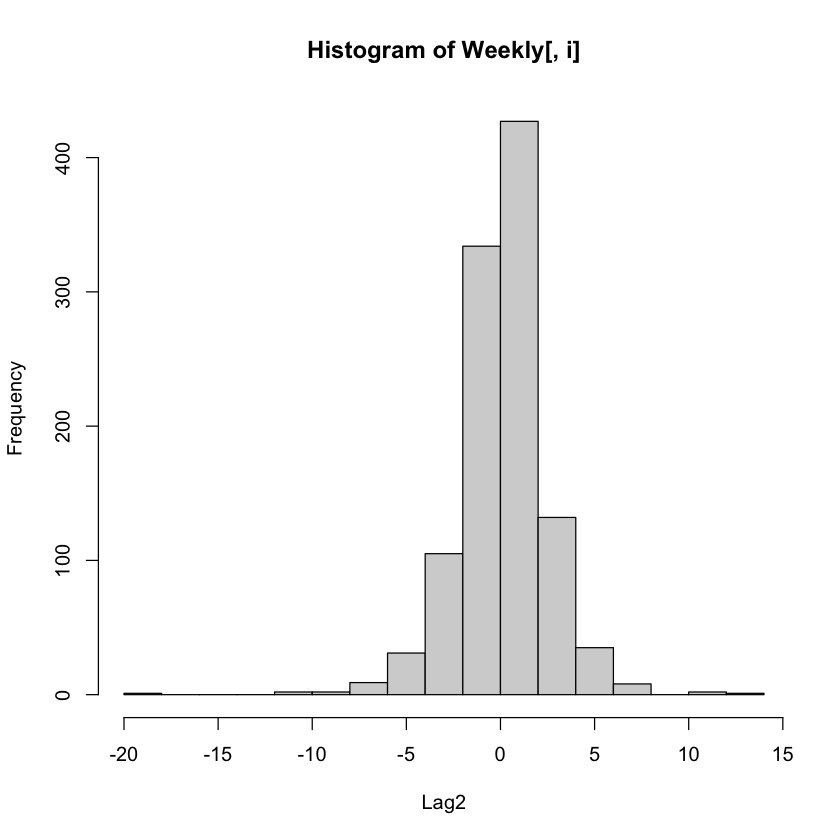

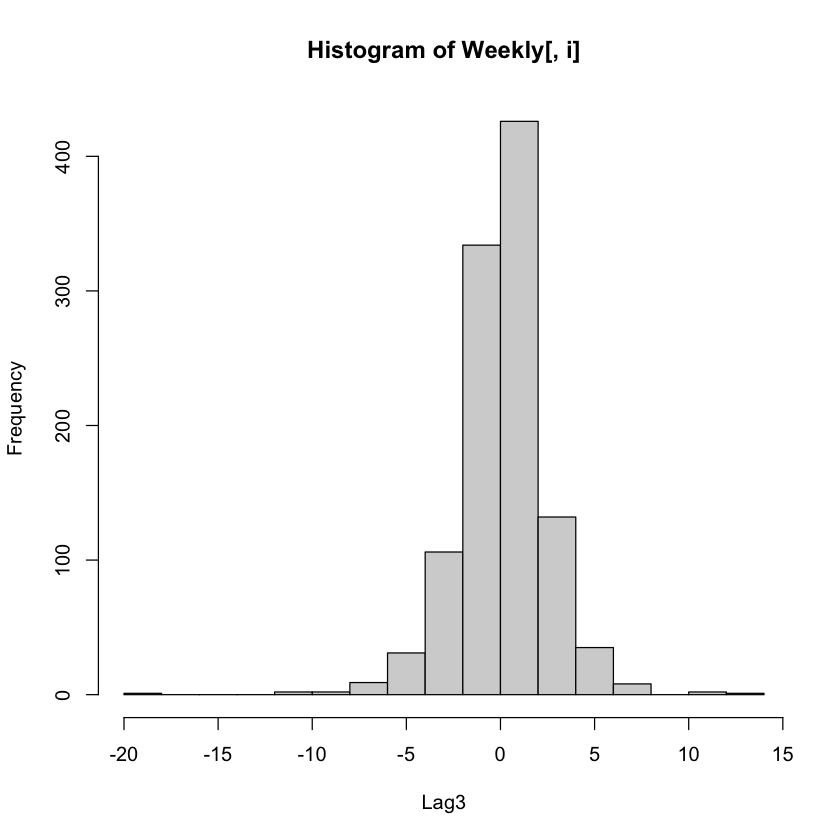

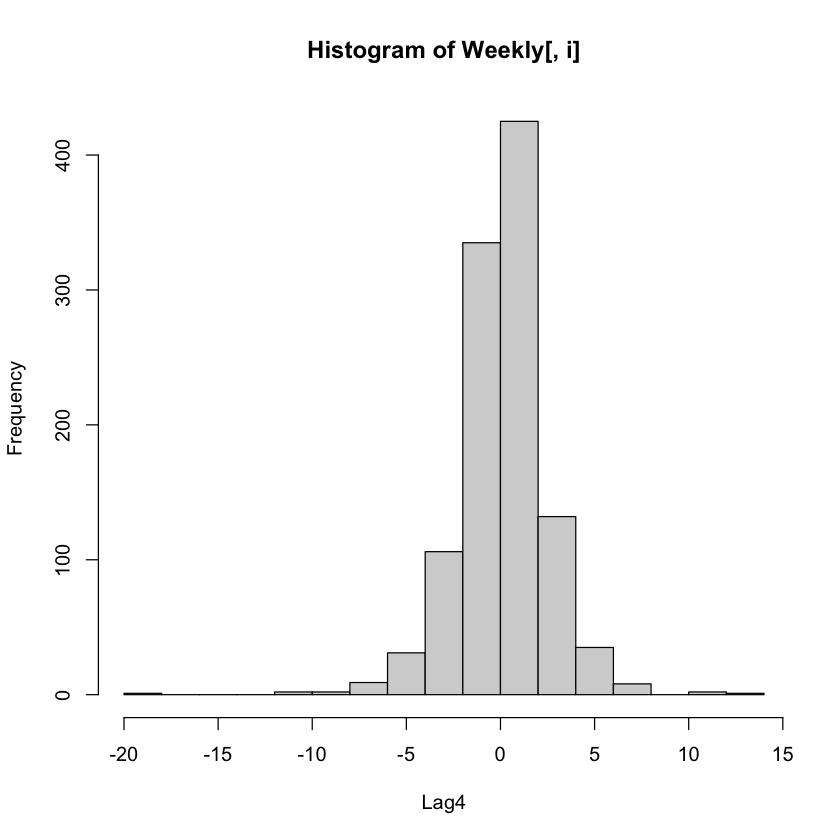

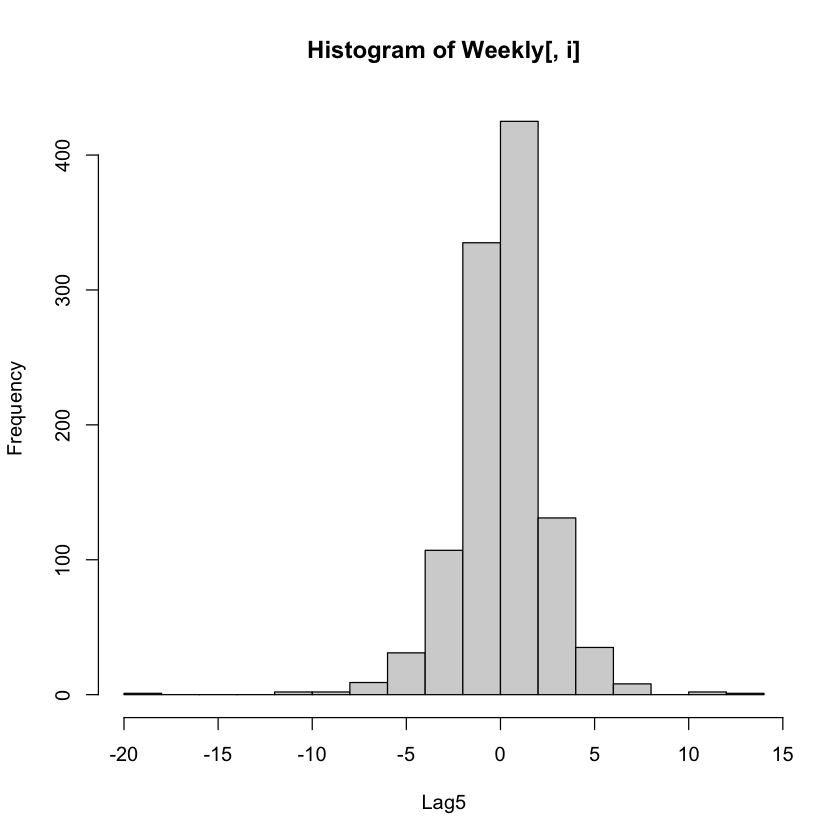

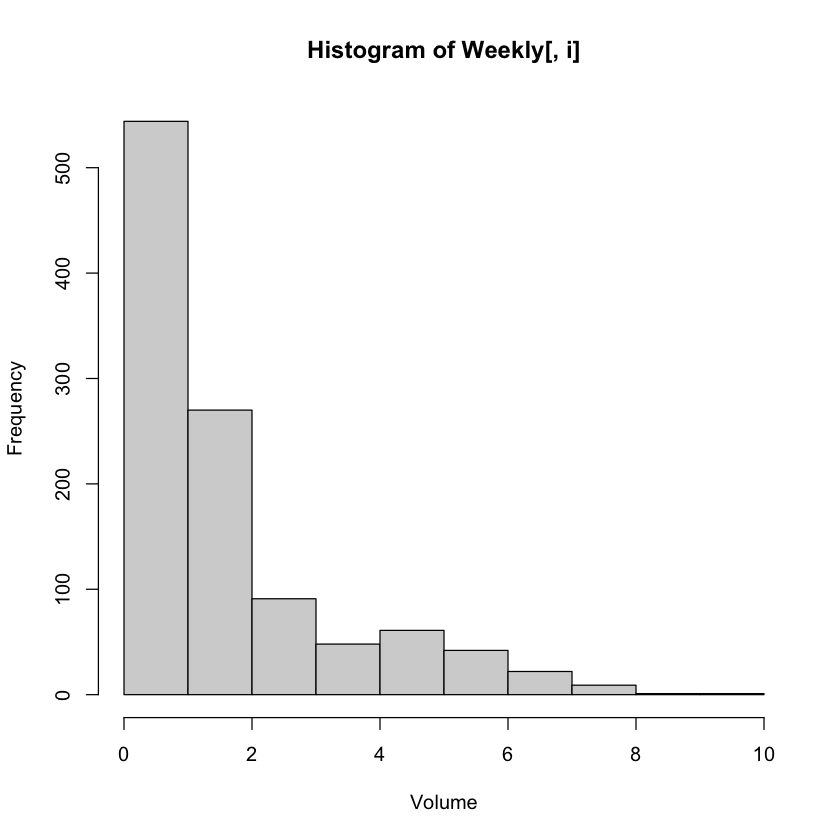

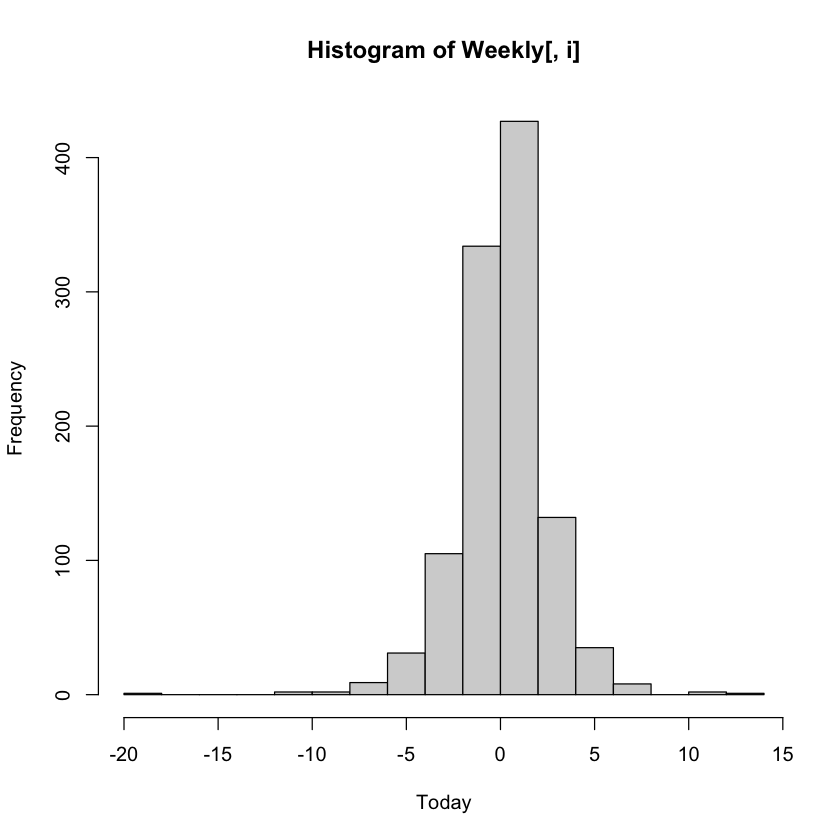

In [103]:
#plot histograms to observe distributions of features. Considerations: LDA & QDA 

for(i in 1:length(colnames(Weekly[,-9]))){
    Weekly = Weekly[,-9]
    hist(Weekly[,i],xlab=colnames(Weekly[i]))
    
}
#insight: all distributions of numerical features are approximately normally distributed besides volume and today

In [104]:
data('Weekly')

In [105]:
#check distribution of response 

Weekly %>% 
group_by(Direction) %>% 
dplyr::count(sort=TRUE)

Direction,n
<fct>,<int>
Up,605
Down,484


Patterns: Only significant correlations exist between `Year` and `Volume` variables, which are almost perfectly positvely correlated. All numerical variables are approximately normally distributed with the exception of `Year` and `Volume`.

* (b) Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones? 

In [106]:
#b

#fit logistic regression
glm.fit = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data=Weekly, family=binomial)

In [107]:
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Lag2 appears to be the only statistically significant independent variable. 

* (C) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression. 

In [108]:
#c

#predict probabilities 
glm.probs = predict(glm.fit,type='response')

glm.probs[1:5]

1         2         3         4         5 
0.6086249 0.6010314 0.5875699 0.4816416 0.6169013

In [109]:
#encode probabilities as categorical response variable (Direction;Up/Down)
glm.pred = ifelse(glm.probs > 0.5,"Up","Down")

In [110]:
#compute confusion matrix
confusionMatrix(as.factor(glm.pred),Weekly$Direction,positive='Up')

Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down   54  48
      Up    430 557
                                         
               Accuracy : 0.5611         
                 95% CI : (0.531, 0.5908)
    No Information Rate : 0.5556         
    P-Value [Acc > NIR] : 0.369          
                                         
                  Kappa : 0.035          
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.9207         
            Specificity : 0.1116         
         Pos Pred Value : 0.5643         
         Neg Pred Value : 0.5294         
             Prevalence : 0.5556         
         Detection Rate : 0.5115         
   Detection Prevalence : 0.9063         
      Balanced Accuracy : 0.5161         
                                         
       'Positive' Class : Up             
                                         

In [111]:
TPR = 557/605 #True Postive Rate (Sensitivity) Type II error
TPR

[1] 0.9206612

In [112]:
FPR = 54/484 #False Postive Rate (1-Specificity) Type I error
FPR

[1] 0.1115702

In [113]:
PPV = 557/987 #Precision TP/FP+TP
PPV

[1] 0.5643364

In [114]:
NPV = 54/102
NPV

[1] 0.5294118

The strong sensitivity or true positve rate of 0.92 demonstrates that the model adequatly classified positive responses. I.e 92% of the observations we predicted would go up indeed went up in actuality. However, on the other hand, the false positive rate is only 0.11 indicating the model was only able to correctly classify 11% of negative responses correctly. Additionally, the precision or positve prediction value of 0.56 tells us that 56% of those observations predicted to be positive were actually positive. As for the negative prediction value of 0.52, of all the observations predicted to have a negative response, 52% of them were actually negative. 

* (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010). 

In [115]:
#store year range from 1990 to 2008 in a variable
timeframe90to08 = seq(from=1990,to=2008,by=1)

#subset df to select only Lag2 for year range 1990:2008
train = subset(Weekly, Weekly$Year %in% timeframe90to08, select=c('Lag2','Direction'))

test = Weekly[Weekly$Year > 2008,]

In [116]:
#fit logistic regression
train.fit = glm(Direction ~ Lag2, data=train, family=binomial)

#print summary metrics
summary(train.fit)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [117]:
#predict probabilities 
train.probs = predict(train.fit,newdata=test,type='response')

#encode probabilities as categorical response variable (Direction;Up/Down)
train.preds = ifelse(train.probs > 0.5,"Up","Down")

In [118]:
#compute confusion matrix
confusionMatrix(as.factor(train.preds),test$Direction,positive='Up')

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9  5
      Up     34 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.2439         
                                         
                  Kappa : 0.1414         
                                         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.9180         
            Specificity : 0.2093         
         Pos Pred Value : 0.6222         
         Neg Pred Value : 0.6429         
             Prevalence : 0.5865         
         Detection Rate : 0.5385         
   Detection Prevalence : 0.8654         
      Balanced Accuracy : 0.5637         
                                         
       'Positive' Class : Up             
                                         

* (e) Repeat (d) using LDA. 

In [119]:
#fit LDA 
ldaTrain = lda(Direction ~ Lag2, data=train)
#predict
ldaPreds = predict(ldaTrain, newdata=test)
#compute confusion matrix
confusionMatrix(data=ldaPreds$class,
                reference=test$Direction,
                positive='Up')

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9  5
      Up     34 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.2439         
                                         
                  Kappa : 0.1414         
                                         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.9180         
            Specificity : 0.2093         
         Pos Pred Value : 0.6222         
         Neg Pred Value : 0.6429         
             Prevalence : 0.5865         
         Detection Rate : 0.5385         
   Detection Prevalence : 0.8654         
      Balanced Accuracy : 0.5637         
                                         
       'Positive' Class : Up             
                                         

In [120]:
#fit QDA
qdaTrain = qda(Direction ~ Lag2, data=train)
#predict
qdaPreds = predict(qdaTrain, newdata=test)
#compute confusion matrix
confusionMatrix(data=qdaPreds$class,
                reference=test$Direction,
                positive='Up')

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    0  0
      Up     43 61
                                          
               Accuracy : 0.5865          
                 95% CI : (0.4858, 0.6823)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.5419          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.504e-10       
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.5865          
         Neg Pred Value :    NaN          
             Prevalence : 0.5865          
         Detection Rate : 0.5865          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : Up              
                              

In [121]:
#set random seed
set.seed(123)

#predict
knnWeekly = knn(train = data.frame(Lag2 = train$Lag2),
               test = data.frame(Lag2 = test$Lag2),
               cl = train$Direction,
               k = 1,
               prob = T)

In [122]:
#compute confusion matrix
confusionMatrix(data=knnWeekly,
               reference=test$Direction,
               positive = "Up")

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   21 29
      Up     22 32
                                         
               Accuracy : 0.5096         
                 95% CI : (0.4097, 0.609)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.9540         
                                         
                  Kappa : 0.0127         
                                         
 Mcnemar's Test P-Value : 0.4008         
                                         
            Sensitivity : 0.5246         
            Specificity : 0.4884         
         Pos Pred Value : 0.5926         
         Neg Pred Value : 0.4200         
             Prevalence : 0.5865         
         Detection Rate : 0.3077         
   Detection Prevalence : 0.5192         
      Balanced Accuracy : 0.5065         
                                         
       'Positive' Class : Up             
                                         

* (h) Which of these methods appears to provide the best results on this data? 

The initial logistic regression model and LDA both displayed accuracy of 0.625. Additionally, all other performance indicators for the two models were identical. We can safely assume they tie for best performance amongst these models. 

* (i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier. 

In [123]:
#predict using log reg model with interaction term 

#reset train set to include all features
train = subset(Weekly, Weekly$Year %in% timeframe90to08)

interactionLogreg = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Lag1:Lag2, data=train, family = "binomial")

summary(interactionLogreg)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Lag1:Lag2, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7876  -1.2525   0.9871   1.0878   1.5841  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.221022   0.065137   3.393 0.000691 ***
Lag1        -0.051332   0.030991  -1.656 0.097656 .  
Lag2         0.052578   0.029586   1.777 0.075550 .  
Lag3        -0.010246   0.029408  -0.348 0.727536    
Lag4        -0.026192   0.029307  -0.894 0.371467    
Lag5        -0.031380   0.028988  -1.083 0.279029    
Lag1:Lag2    0.002960   0.007724   0.383 0.701596    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1344.9  on 978  degrees of freedom
AIC: 1358.9

Number of Fisher Scoring iterations: 4


In [124]:
#predict probabilities
interactionLogregProbs = predict(interactionLogreg,newdata=test,type='response')
#create labels
interactionLogregPreds = ifelse(interactionLogregProbs>0.5,"Up","Down")
#compute confusion matrix
confusionMatrix(as.factor(interactionLogregPreds),reference=test$Direction,positive="Up")

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   10 13
      Up     33 48
                                        
               Accuracy : 0.5577        
                 95% CI : (0.457, 0.655)
    No Information Rate : 0.5865        
    P-Value [Acc > NIR] : 0.757916      
                                        
                  Kappa : 0.0209        
                                        
 Mcnemar's Test P-Value : 0.005088      
                                        
            Sensitivity : 0.7869        
            Specificity : 0.2326        
         Pos Pred Value : 0.5926        
         Neg Pred Value : 0.4348        
             Prevalence : 0.5865        
         Detection Rate : 0.4615        
   Detection Prevalence : 0.7788        
      Balanced Accuracy : 0.5097        
                                        
       'Positive' Class : Up            
                                        

In [125]:
#knn with CV validation 

train$Today <- NULL

ctrl <- trainControl(method = "repeatedcv",
                     number = 5,
                     repeats = 5)

set.seed(111)

knn_train <- train(y = train$Direction,
                   x = train[ ,-8],
                   method = "knn",
                   metric = "Accuracy",
                   preProcess = c("center", "scale"),
                   tuneGrid = expand.grid(k = seq(1, 50, 2)),
                   trControl = ctrl)

caret::varImp(knn_train)

ROC curve variable importance

       Importance
Lag1      100.000
Lag2       77.256
Lag5       64.309
Year       45.659
Volume     43.735
Lag4        4.578
Lag3        0.000

In [126]:
knn_train

k-Nearest Neighbors 

985 samples
  7 predictor
  2 classes: 'Down', 'Up' 

Pre-processing: centered (7), scaled (7) 
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 788, 788, 788, 788, 788, 787, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa       
   1  0.4947924  -0.020969692
   3  0.5155248   0.016460494
   5  0.5267047   0.035337840
   7  0.5449675   0.068352324
   9  0.5386680   0.050277530
  11  0.5396729   0.049881168
  13  0.5394915   0.045941631
  15  0.5419291   0.048865692
  17  0.5417199   0.048111742
  19  0.5435483   0.049817352
  21  0.5399048   0.040900995
  23  0.5368705   0.033294371
  25  0.5354471   0.026370146
  27  0.5374848   0.030257622
  29  0.5324014   0.017531374
  31  0.5376754   0.026443861
  33  0.5395090   0.029351262
  35  0.5399162   0.030192184
  37  0.5348297   0.017980241
  39  0.5348369   0.017193861
  41  0.5289423   0.002794135
  43  0.5334043   0.011441984
  45  0.5386804   0.022778566


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



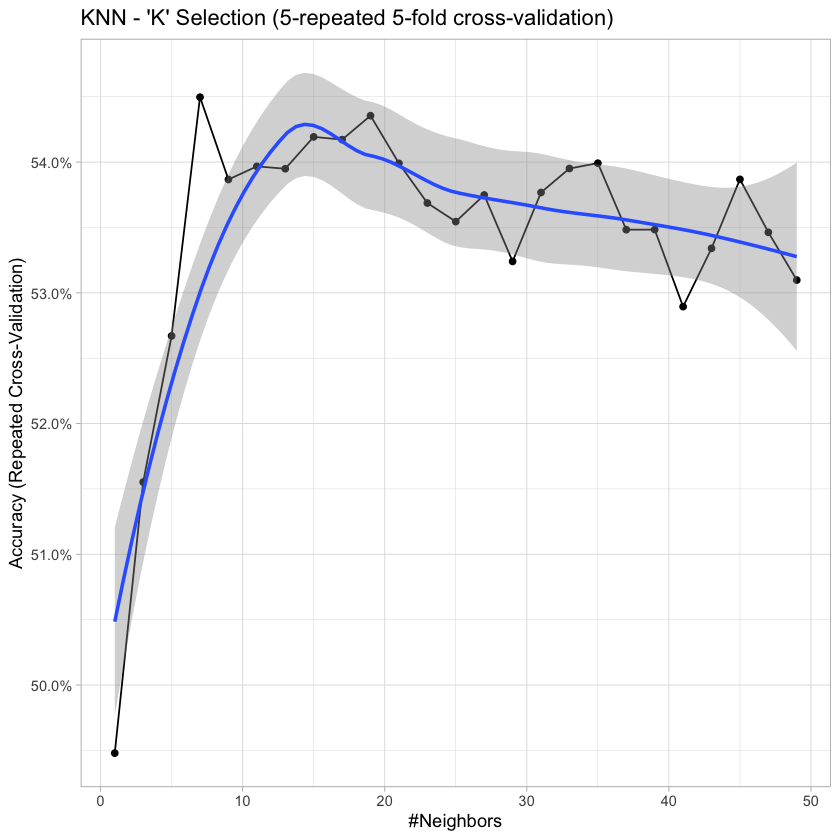

In [127]:
ggplot(knn_train) +
  geom_smooth() +
  theme_light() +
  scale_y_continuous(labels = scales::percent_format()) +
  ggtitle("KNN - 'K' Selection (5-repeated 5-fold cross-validation)")

Ultimately, after comparing both experiemental models, logestic regression on including all five Lag variables as well as an interaction term between Lag2 and a KNN with five repeated five-fold cross-validation to optimize the parameter K, the logestic regression with interaction term was the most performant with an accuracy of 0.5577 compared to the KNN models best accuracy score (K = 15) 0.5419291. 

* 11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set. 

 * (a) Create a binary variable, `mpg01`, that contains 1 if `mpg` contains a value above its median, and 0 if `mpg` contains a value below its median. You can compute the median using the `median()` function. Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `mpg01` and the other `Auto` variables. 

In [128]:
data('Auto')

In [129]:
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [130]:
#compute median of mpg 
medianMpg = median(Auto$mpg)
medianMpg

[1] 22.75

In [131]:
#create dummy variable 1 if mpg value is greater than the columns median and 0 otherwise
Auto$mpg01 <- factor(as.numeric(Auto$mpg > medianMpg))

Auto %>% group_by(mpg01) %>%
dplyr::count()

mpg01,n
<fct>,<int>
0,196
1,196


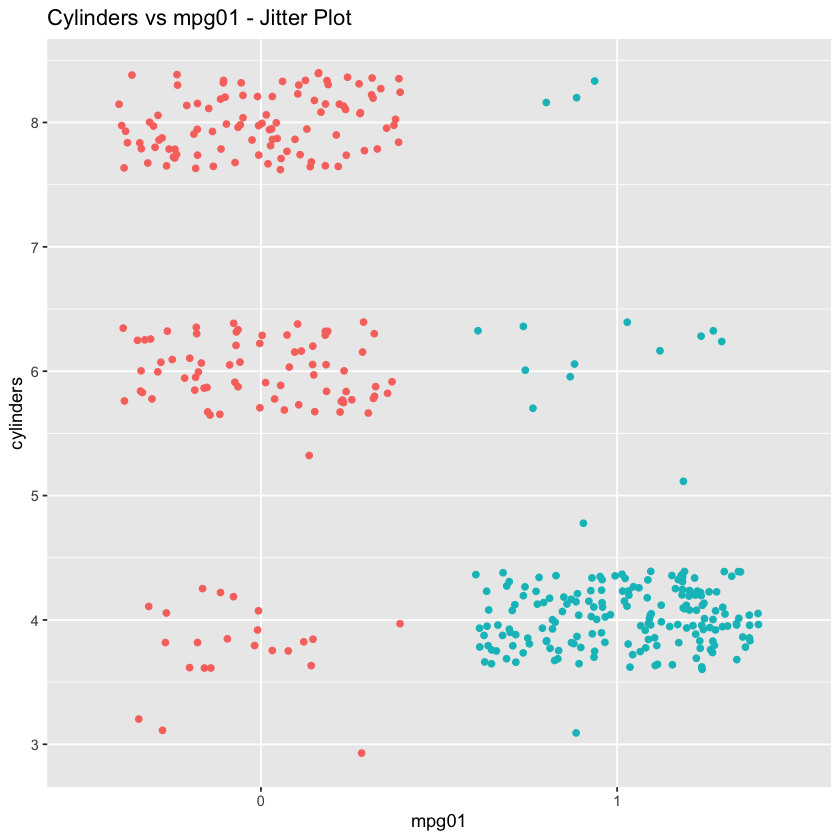

In [132]:
#jitter plot comparing mpg01 and cylinders
mpg01CylJitterPlot = ggplot(Auto,aes(x=mpg01,y=cylinders,col=mpg01)) +
geom_jitter() + 
theme(legend.position = "none") + 
ggtitle("Cylinders vs mpg01 - Jitter Plot") 



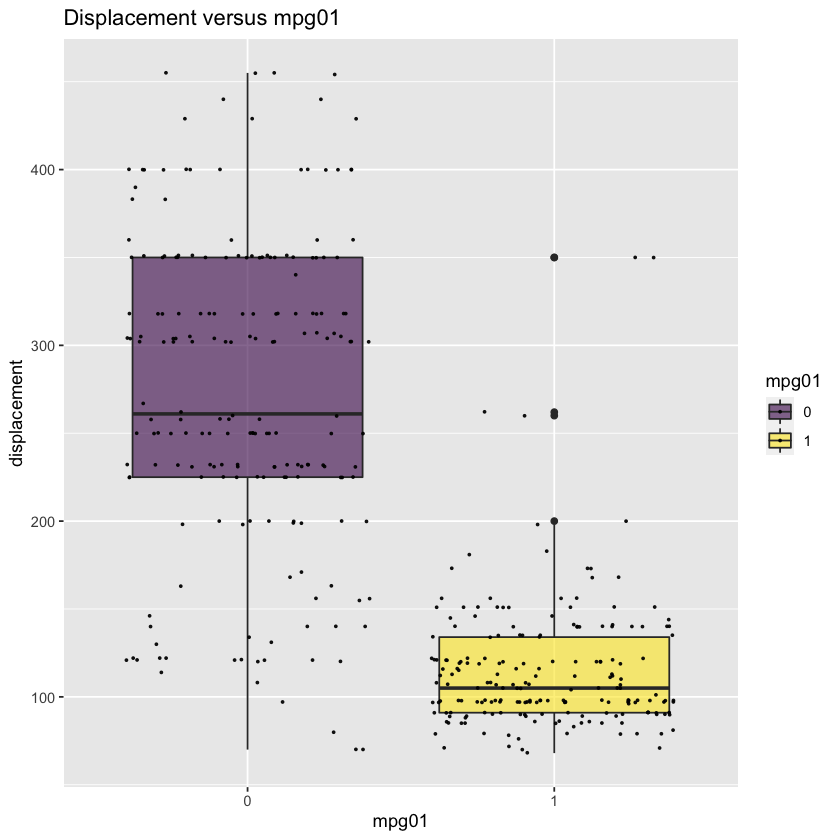

In [133]:
#boxplot displacement versus mpg01
displacementVsMpg01Boxplot = ggplot(Auto,aes(x=mpg01,y=displacement,fill=mpg01)) +
geom_boxplot() + geom_jitter(color="black", size=0.4, alpha=0.9) + scale_fill_viridis(discrete = TRUE, alpha=0.6) +
ggtitle('Displacement versus mpg01')




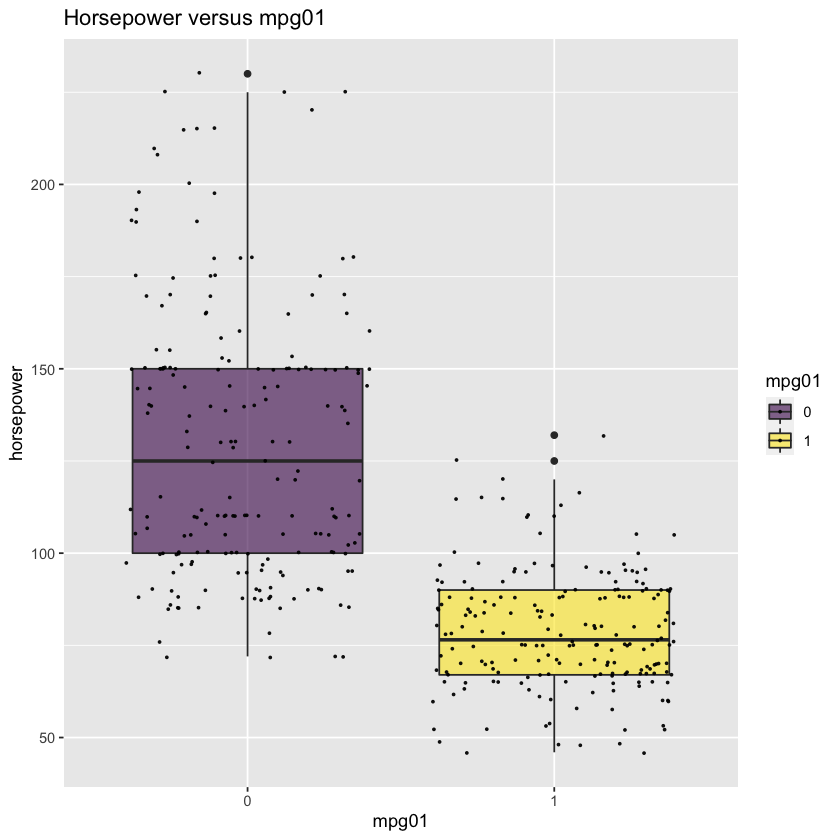

In [134]:
#boxplot horsepower versus mpg01
horsepowerVsMpg01Boxplot = ggplot(Auto,aes(x=mpg01,y=horsepower,fill=mpg01)) +
geom_boxplot() + geom_jitter(color="black", size=0.4, alpha=0.9) + scale_fill_viridis(discrete = TRUE, alpha=0.6) +
ggtitle('Horsepower versus mpg01')




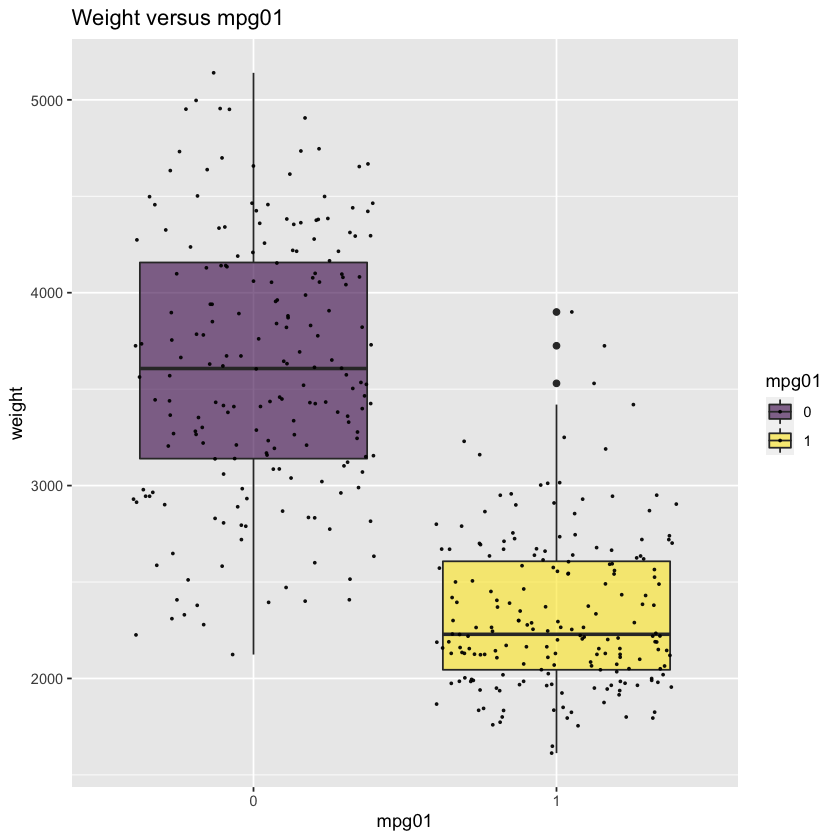

In [135]:
#boxplot weight versus mpg01
weightVsMpg01Boxplot = ggplot(Auto,aes(x=mpg01,y=weight,fill=mpg01)) +
geom_boxplot() + geom_jitter(color="black", size=0.4, alpha=0.9) + scale_fill_viridis(discrete = TRUE, alpha=0.6) +
ggtitle('Weight versus mpg01')




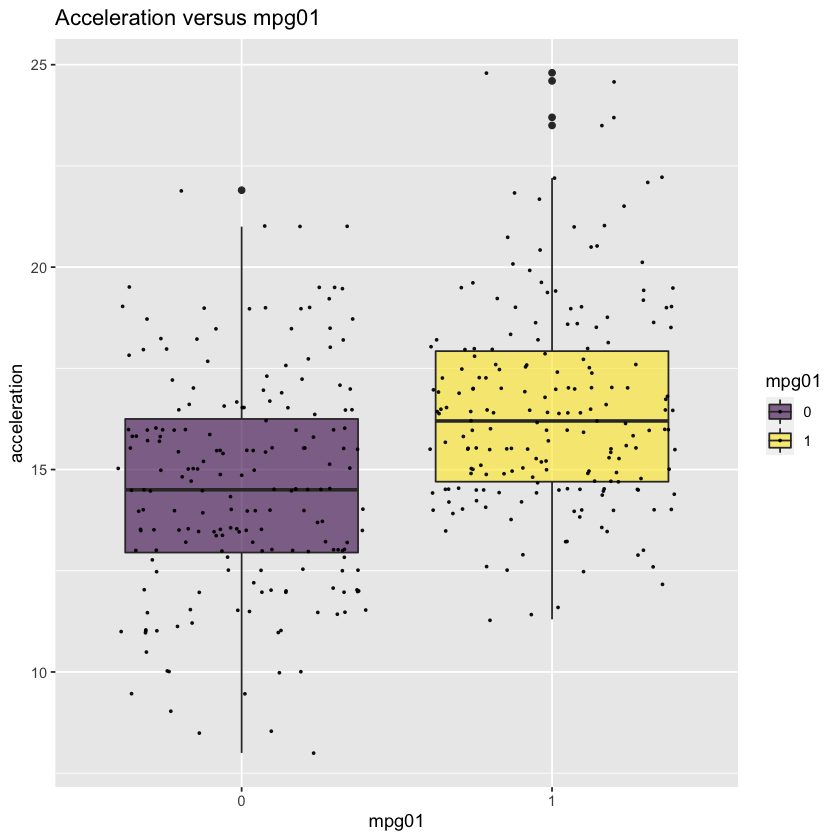

In [136]:
#boxplot acceleration versus mpg01
accelerationVsMpg01Boxplot = ggplot(Auto,aes(x=mpg01,y=acceleration,fill=mpg01)) +
geom_boxplot() + geom_jitter(color="black", size=0.4, alpha=0.9) + scale_fill_viridis(discrete = TRUE, alpha=0.6) +
ggtitle('Acceleration versus mpg01')




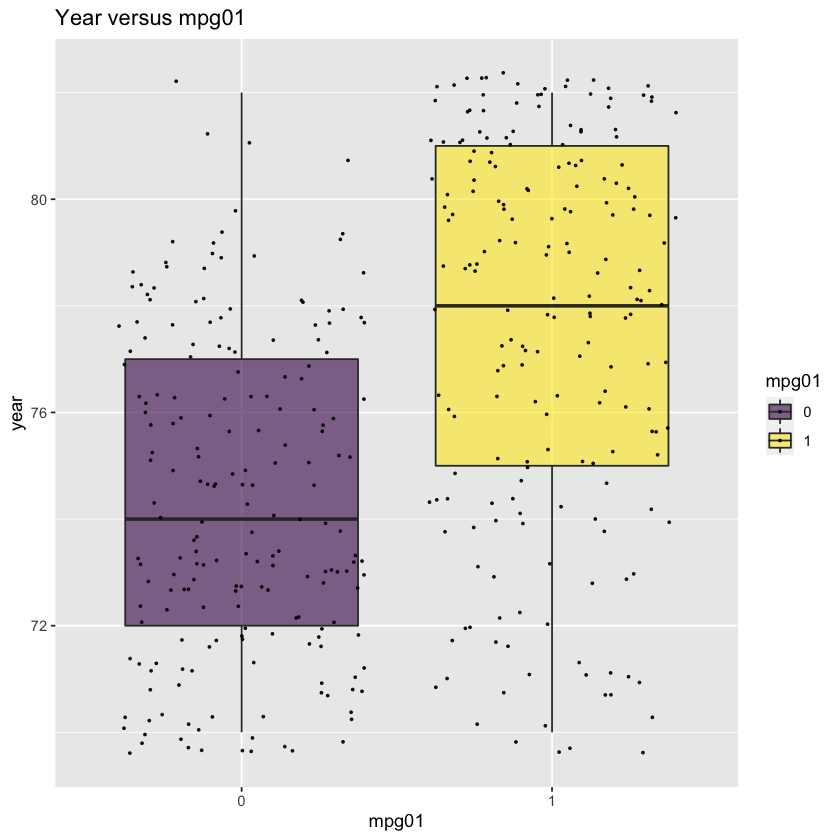

In [137]:
#boxplot year versus mpg01
yearVsMpg01Boxplot = ggplot(Auto,aes(x=mpg01,y=year,fill=mpg01)) +
geom_boxplot() + geom_jitter(color="black", size=0.4, alpha=0.9) + scale_fill_viridis(discrete = TRUE, alpha=0.6) +
ggtitle('Year versus mpg01')




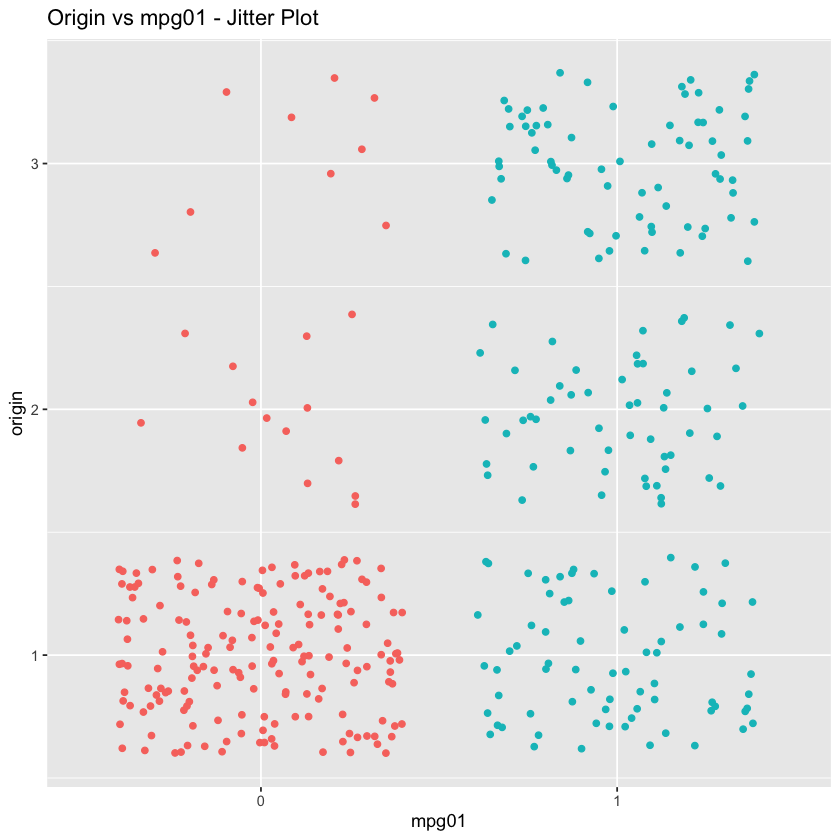

In [138]:
#jitter plot origin versus mpg01 
originVsMpg01Jitter = ggplot(Auto,aes(x=mpg01,y=origin,col=mpg01)) +
geom_jitter() + 
theme(legend.position = "none") + 
ggtitle("Origin vs mpg01 - Jitter Plot") 



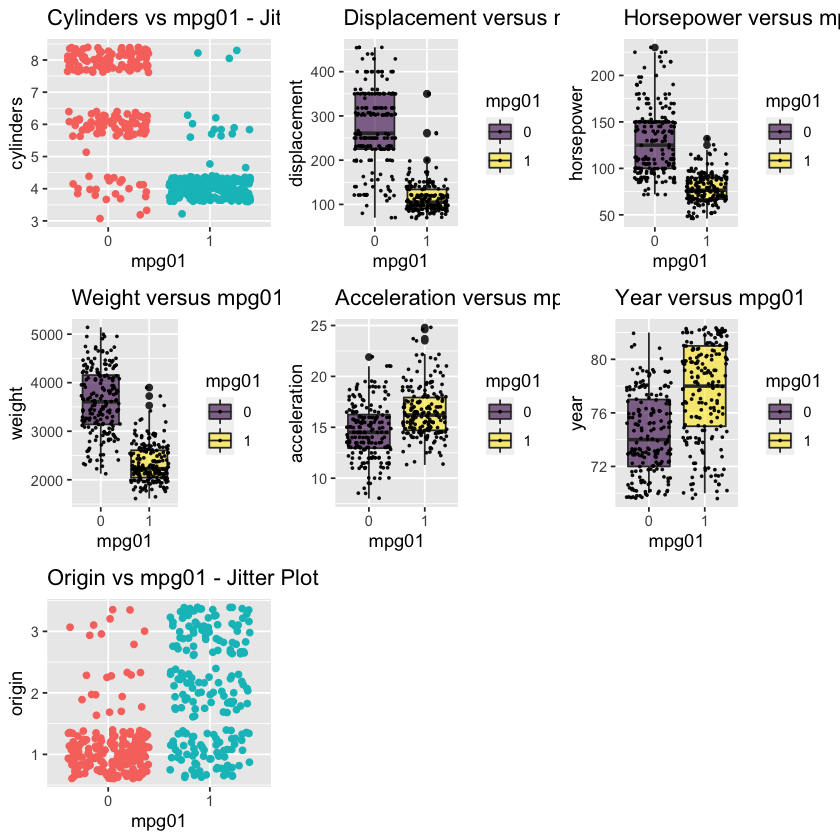

In [139]:
#show all plots in grid
grid.arrange(mpg01CylJitterPlot,displacementVsMpg01Boxplot,horsepowerVsMpg01Boxplot,weightVsMpg01Boxplot,accelerationVsMpg01Boxplot,yearVsMpg01Boxplot,originVsMpg01Jitter)

The `cylinders` versus `mpg01` jitter plot indicates that for observations without an mpg above the median mpg, the central tendancy of number of cylinders lies somewhere between 6-8 cylinders while for those oberservations with a value of one for mpg01, the central tendancy for number of cylinders is aproximately four cylinders. Therefore we see that those vehicles with an above median mpg tend to on average have less cylinders.

The boxplot of `displacement` versus `mpg01` shows that for those oberservations with a value of 0 for `mpg01`, the central tendancy of `displacement` is approximately an order of magnitude greater than that of observations with a value of 1 for `mpg01`. Additionally, the spread of oberservations with a value of 0 for `mpg01` is far greater in terms of `displacement`.

The boxplot of `horespower` versus `mpg01` indicates a very similar situation to the boxplot of `displacement` versus `mpg01`, as does the boxplot of `weight` versus `mpg01`. However, the `weight`'s of obeservations with a value of 0 for `mpg01`, tend to have a central tendancy approximately two orders of magnitude greater than those with a value of 1.

The boxplot of `acceleration` versus `mpg01` indicates that the central tendency of `acceleration` for observations with a value of 1 for `mpg01` is greater. However, the difference in median `acceleration` is only approximately three units. Additionally, the spread for observations with a value of 1 for `mpg01` appears to be greater with more outliers appear on the boxplot. 

The  boxplot of `year` versus `mpg01` indicates that oberservations with a value of 1 for `mpg01` have a central tendancy greater than observations witha value of 0. The discrepcancy in medians appears to be approximately four units (years).

The jitter plot of `origin` versus `mpg01` indicates that the highest concentration of observations falls in the category of observations with a value of 0 for `mpg01` and a value of 1 for `origin`.




* (c) Split the data into a training set and a test set. 

In [141]:
#set random seed for sample function
set.seed(123)

#train:test split of 75:25
sample = sample.int(n = nrow(Auto), size = floor(.75*nrow(Auto)), replace = FALSE)

train = Auto[sample,]
test = Auto[-sample,]

* (d). Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained? 

In [146]:
set.seed(123)

ldaTrain <- train(mpg01 ~ cylinders + displacement +horsepower + weight + acceleration, 
                 data = train, 
                 method = "lda")

In [147]:
#train error rate
ldaTrain$results$Accuracy

[1] 0.8985577

In [154]:
ldaPreds <- predict(ldaTrain, newdata = test, type = "raw") 
#test error rate
testErrorLda = mean(ldaPreds != test$mpg01)
testErrorLda

[1] 0.122449

* (e) Perfrom QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error rate of the model obtained? 

In [149]:
set.seed(123)
#train
qdaTrain <- train(mpg01 ~ cylinders + displacement +horsepower + weight + acceleration, 
                 data = train, 
                 method = "qda")

In [153]:
#train error rate
qdaTrain$results$Accuracy

[1] 0.8964395

In [155]:
#predict
qdaPreds <- predict(qdaTrain, newdata = test, type = "raw") 
#test error rate
testErrorQda = mean(qdaPreds != test$mpg01)
testErrorQda

[1] 0.1020408

In [156]:
testErrorLda - testErrorQda

[1] 0.02040816

QDA perfroms better than LDA by a margin of 0.0204

* (f) Perform logistic regression on the training data in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? 

In [157]:
#train
LogregTrain = train(mpg01 ~ cylinders + displacement +horsepower + weight + acceleration, 
                 data = train, 
                 method = "glm",
                 family = 'binomial')

In [158]:
#train error 
LogregTrain$results$Accuracy

[1] 0.9026066

In [160]:
#predict
LogregPreds = predict(LogregTrain, newdata=test,type='raw')

#test error rate
mean(LogregPreds != test$mpg01)

[1] 0.122449

The test error rate of the Logistic Regression model is identical to that of the LDA model.

* (g) Perform KNN on the training data, with several values of K, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set. 

In [161]:
#initiate 5-fold cross validation using caret to try 5 different values for K
trControl = trainControl(method="cv",
                        number=5)

In [162]:
#fit and train
fitKNN = train(mpg01 ~ cylinders + displacement +horsepower + weight + acceleration,
              method='knn',
              tuneGrid=expand.grid(k=1:10),
              trControl=trControl,
              metric='Accuracy',
              data=train)

In [163]:
#show output and evaluate accuracy
fitKNN

k-Nearest Neighbors 

294 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 235, 235, 235, 236, 235 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.8908825  0.7816734
   2  0.8637054  0.7272938
   3  0.8706604  0.7412603
   4  0.8843366  0.7685699
   5  0.8774985  0.7549423
   6  0.8807715  0.7614669
   7  0.8775570  0.7549750
   8  0.8708358  0.7415152
   9  0.8707189  0.7411680
  10  0.8639392  0.7275972

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

In [164]:
#train error rate
max(fitKNN$results$Accuracy) #optimal value for K for train rate = 1

[1] 0.8908825

As imagined, the optimal value to minimize train error rate is k=1 which is approaching perferfect accuracy as it uses the closest neighbor for prediction, which sometimes can be the datum itself.

In [166]:
#predict 
KNNpreds = predict(fitKNN,newdata=test,type='raw')

mean(KNNpreds != test$mpg01)

[1] 0.1734694

As the model determined that K = 1 is optimal in training, it then used 1 for K in prediction on test data resulting in an overestimated train error rate and the least performant model in terms of test error rate. 